<a href="https://colab.research.google.com/github/dubeyabhi07/hands-on-scikit-learn/blob/master/parameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Parameter-tuning using K-fold
- Tuning k for KNeighborsClassifier 

In [34]:
# search for an optimal value of K for KNN
k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print("Best hyperParameter(k) : %0.2f"%(max(k_scores)))

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334]
Best hyperParameter(k) : 0.98


Text(0, 0.5, 'Cross-Validated Accuracy')

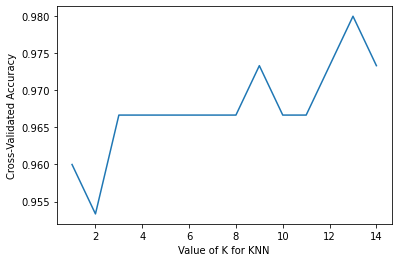

In [35]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# More efficient parameter tuning using GridSearchCV
- It allows us to define a grid of parameters that will be searched using K-fold cross-validation

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)


# fit the grid with data
grid.fit(X, y)
print(grid)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)


In [37]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000589,0.000254,0.001448,0.000445,1,{'n_neighbors': 1},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.000000,1.0,1.0,0.960000,0.053333,13
1,0.000415,0.000020,0.001151,0.000075,2,{'n_neighbors': 2},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,0.933333,1.0,1.0,0.953333,0.052068,14
2,0.000419,0.000019,0.001166,0.000090,3,{'n_neighbors': 3},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,11
3,0.000413,0.000018,0.001193,0.000115,4,{'n_neighbors': 4},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,11
4,0.000471,0.000084,0.001298,0.000222,5,{'n_neighbors': 5},1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,5
5,0.000416,0.000020,0.001158,0.000068,6,{'n_neighbors': 6},1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,5
6,0.000420,0.000026,0.001139,0.000011,7,{'n_neighbors': 7},1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,5
7,0.000417,0.000020,0.001155,0.000023,8,{'n_neighbors': 8},1.0,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,5
8,0.000416,0.000021,0.001196,0.000098,9,{'n_neighbors': 9},1.0,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.973333,0.032660,2
9,0.000417,0.000016,0.001174,0.000054,10,{'n_neighbors': 10},1.0,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.966667,0.044721,5


Text(0, 0.5, 'Cross-Validated Accuracy')

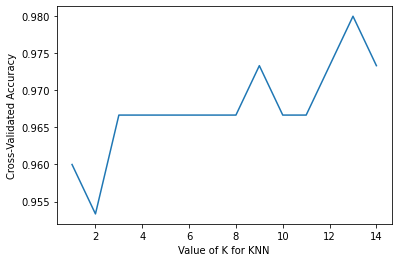

In [38]:
# plot the results
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [39]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


# Using RandomizedSearchCV and multi-parameter tuning

- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# specify "parameter distributions" rather than a "parameter grid"
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 6}"
1,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 14}"
2,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 6}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 11}"
4,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 11}"
5,0.953333,0.052068,"{'weights': 'uniform', 'n_neighbors': 2}"
6,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
7,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 13}"
8,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
9,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 7}"


In [42]:
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


- Above code selects same Model in 10 iterations. 
- Grid search would have done 2*15 iterations.